In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("car data (3) (1).csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Distribution

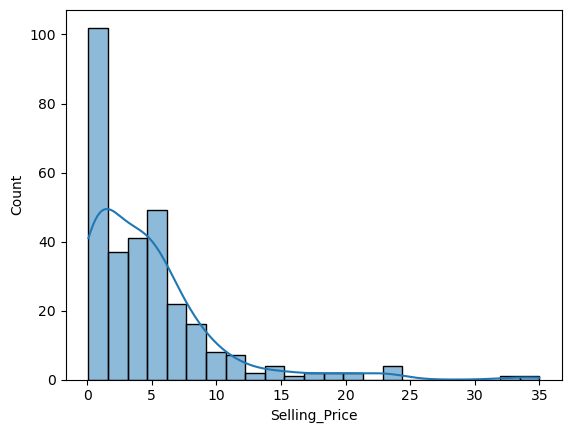

In [31]:
sns.histplot(df["Selling_Price"],kde=True);


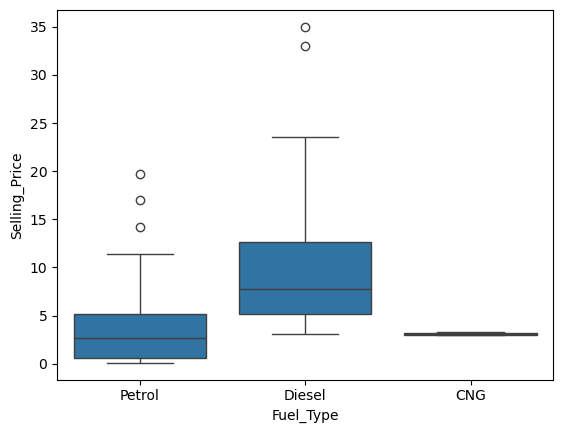

In [33]:
sns.boxplot(x=df["Fuel_Type"],y=df["Selling_Price"]);

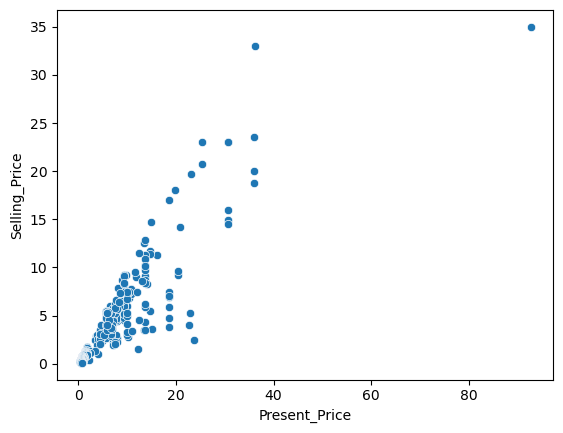

In [35]:
sns.scatterplot(x=df["Present_Price"],y=df["Selling_Price"]);

# Correlation

In [50]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


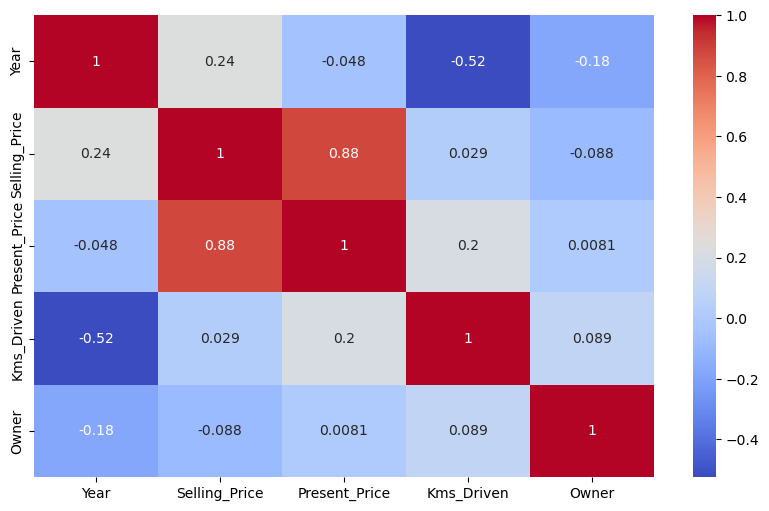

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm");

# Categorical data Analysis

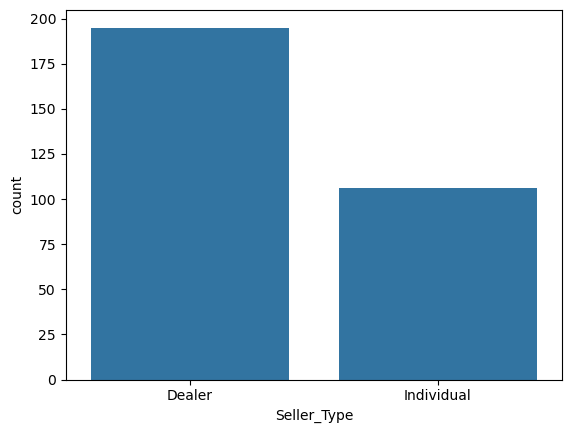

In [56]:
sns.countplot(x="Seller_Type",data=df);

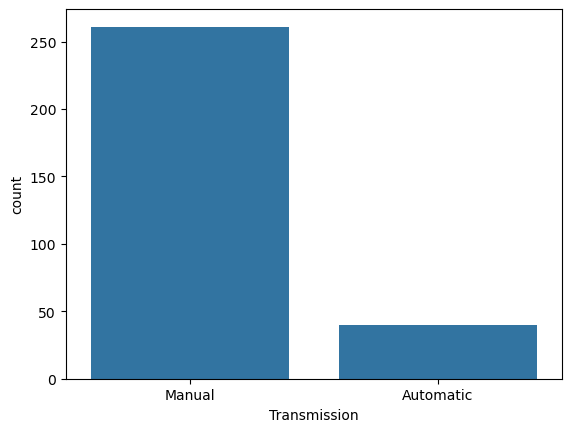

In [58]:
sns.countplot(x="Transmission",data=df);

# Feature Engineering

In [66]:
df["Car_Name"]=df["Car_Name"].apply(lambda x:x.split(" ")[0])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Now we Create a feature the age of the Car

In [70]:
df["Car_Age"]=2025-df["Year"]

In [80]:
df.drop(columns="Year",inplace=True)

# Apply One-Hot Encoding On Nominal data

In [84]:
for i in df.select_dtypes(include="O"):
    if i!="Car_Name":
        print(i,'..',df[i].unique(),df[i].nunique())

Fuel_Type .. ['Petrol' 'Diesel' 'CNG'] 3
Seller_Type .. ['Dealer' 'Individual'] 2
Transmission .. ['Manual' 'Automatic'] 2


In [ ]:
#

In [88]:
df1=pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"],drop_first=True)
df1.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,11,False,True,False,True


# For Car Name we Apply Mean Target column Encoding

In [99]:
df.groupby(["Car_Name"])["Selling_Price"].mean()

Car_Name
800          0.350000
Activa       0.340000
Bajaj        0.528000
Hero         0.362000
Honda        0.438235
Hyosung      1.350000
KTM          1.337500
Mahindra     1.150000
Royal        1.144706
Suzuki       0.250000
TVS          0.462500
UM           1.700000
Yamaha       0.582500
alto         2.616667
amaze        4.221429
baleno       5.850000
brio         4.745000
camry        2.500000
ciaz         7.472222
city         7.419231
corolla      6.848824
creta       11.800000
dzire        4.475000
elantra     11.600000
eon          2.900000
ertiga       6.775000
etios        4.204545
fortuner    18.685455
grand        4.943750
i10          3.060000
i20          4.766667
ignis        4.900000
innova      12.777778
jazz         5.828571
land        35.000000
omni         1.250000
ritz         2.862500
s            6.500000
swift        4.540000
sx4          3.158333
verna        6.107857
vitara       9.250000
wagon        2.512500
xcent        4.966667
Name: Selling_Price, dt

In [101]:
df.groupby(["Car_Name"])["Selling_Price"].mean().reset_index()

,Car_Name,Selling_Price
0,800,0.350000
1,Activa,0.340000
2,Bajaj,0.528000
3,Hero,0.362000
4,Honda,0.438235
5,Hyosung,1.350000
6,KTM,1.337500
7,Mahindra,1.150000
8,Royal,1.144706
9,Suzuki,0.250000


In [107]:
df2=df.groupby(["Car_Name"])["Selling_Price"].mean().reset_index().rename(columns={"Selling_Price":"car"})
df2.head(2)

,Car_Name,car
0,800,0.35
1,Activa,0.34


# Now we merge the Table on the basis of car_name

In [111]:
df3=pd.merge(df1,df2,on="Car_Name",how="inner")
df3.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car
0,ritz,3.35,5.59,27000,0,11,False,True,False,True,2.862500
1,sx4,4.75,9.54,43000,0,12,True,False,False,True,3.158333
2,ciaz,7.25,9.85,6900,0,8,False,True,False,True,7.472222
3,wagon,2.85,4.15,5200,0,14,False,True,False,True,2.512500
4,swift,4.60,6.87,42450,0,11,True,False,False,True,4.540000


In [113]:
df3.drop(columns="Car_Name",inplace=True)

In [82]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


# Now Ml part

In [118]:
x=df3.drop(columns=["Selling_Price"])
y=df3["Selling_Price"]

# Here We Need Scalling

In [123]:
from sklearn.preprocessing import  StandardScaler

In [127]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [120]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [129]:
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [133]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 9)
(240,)
(61, 9)
(61,)


# Model Training On Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

In [138]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [140]:
lr.coef_

array([ 2.29577086, -0.23921668, -0.08219456, -1.00302876,  0.4974509 ,
        0.04099937, -0.28949098, -0.48142254,  1.8220868 ])

In [142]:

lr.intercept_

4.701989247190428

# Evaluate Model Performance

In [144]:
from sklearn.metrics import mean_squared_error as mse ,mean_absolute_error as mae,r2_score

In [147]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [149]:
print("mean_squared_error on testing data:",mse(y_test,y_pred_test))
print("mean_squared_error on training data:",mse(y_train,y_pred_train))

mean_squared_error on testing data: 3.217489871171269
mean_squared_error on training data: 2.5446287697489733


In [151]:
print("mean_absolute_error on testing data:",mae(y_test,y_pred_test))
print("mean_absolute_error on training data:",mae(y_train,y_pred_train))

mean_absolute_error on testing data: 1.1561672609126978
mean_absolute_error on training data: 1.0369507245153846


In [153]:
print("root mean_squared_error on testing data:",np.sqrt(mse(y_test,y_pred_test)))
print("root mean_squared_error on training data:",np.sqrt(mse(y_train,y_pred_train)))

root mean_squared_error on testing data: 1.7937362880789554
root mean_squared_error on training data: 1.5951892582853526


# Model_Accuracy 

In [156]:
r2_score(y_train,y_pred_train)

0.9037476529267938

In [158]:
r2_score(y_test,y_pred_test)

0.8603252342766803

# Model Training On Decision Tree

In [244]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [246]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)

In [248]:
print("root mean_squared_error on testing data:",np.sqrt(mse(y_test,y_pred_test)))
print("root mean_squared_error on training data:",np.sqrt(mse(y_train,y_pred_train)))

root mean_squared_error on testing data: 1.227145160892402
root mean_squared_error on training data: 6.938893903907228e-18


In [251]:
print("traing Score:",r2_score(y_train,y_pred_train))
print("traing Score:",r2_score(y_test,y_pred_test))

traing Score: 1.0
traing Score: 0.9346278691311165


# Model Training On RandomForest

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [234]:
print("root mean_squared_error on testing data:",np.sqrt(mse(y_test,y_pred_test)))
print("root mean_squared_error on training data:",np.sqrt(mse(y_train,y_pred_train)))

root mean_squared_error on testing data: 0.9710763942150167
root mean_squared_error on training data: 0.6263599815351785


In [187]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

0.9590637970323248

In [240]:
print("traing Score:",r2_score(y_train,y_pred_train))
print("traing Score:",r2_score(y_test,y_pred_test))

traing Score: 0.9851599658400763
traing Score: 0.9590637970323248


In [201]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Hyperparameter Tuning

In [214]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],# No of Trees
    'max_depth': [None, 10, 20, 30],# max depth of tree
    'min_samples_split': [2, 5, 10],# Node split Minimum samples
    'min_samples_leaf': [1, 2, 4],# Leaf node minimum sample
    'max_features': ['auto', 'sqrt', 'log2']
}

In [226]:
import warnings 
warnings.filterwarnings("ignore")

In [228]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,   # 5-fold cross validation
    scoring='r2',
    n_jobs=-1,   # parallel processing for speed
    verbose=1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.881058237762461


In [236]:
best_model = grid_search.best_estimator_

print("Train R2:", best_model.score(x_train, y_train))
print("Test R2:", best_model.score(x_test, y_test))

Train R2: 0.9816865016283345
Test R2: 0.9454025056645471
